**End to End ML Project deployment steps**
 
 1. Create new enviroment to setup the necessary packages required.
 cmd = conda create -n {Env_name} python={python_version_number}
 2. To activate the created environment from above step
 cmd = conda activate {Env_name}
 3. Install necessary packages
 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("car data.csv")
df.head(7)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

**Find the categorical features in the dataset**

In [17]:
cat_cols =[ feature for feature in df.columns if df[feature].dtypes=='O' ]
cat_cols.remove("Car_Name")
cat_cols.extend(["Owner"])

**Finding the unique categories in the cat features** 

In [20]:
for feature in cat_cols:
    print("The no. of unique values in {} are : {}".format(feature,df[feature].unique()))

The no. of unique values in Fuel_Type are : ['Petrol' 'Diesel' 'CNG']
The no. of unique values in Seller_Type are : ['Dealer' 'Individual']
The no. of unique values in Transmission are : ['Manual' 'Automatic']
The no. of unique values in Owner are : [0 1 3]


**Finding and Treating the missing values in the dataset**

In [24]:
!pip install missingno

  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)


*Another way to find the missing values in given dataset*

In [32]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**Describe the 5 pointer stats for numerical features in the datset**

In [33]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


*Compute a new feature called the Car_age_years used to find number of years for car useage from current year 2022* 

In [35]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [36]:
#Remove Car_Name feature as it is not needed for model creation
car_df = df.drop(["Car_Name"],axis=1) 

In [37]:
car_df["Car_Age_years"] = 2022 - car_df["Year"]
car_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [38]:
#Remove the year column as we have got Car-Age_years
car_df.drop(["Year"],axis=1,inplace=True)
car_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


**Do one hot encoding to convert the categorical features to numerical features and drop the first category type as it can be expressed as combination of remaining features** 
*Dummy variable trap*

In [40]:
car_df = pd.get_dummies(car_df,drop_first=True)
car_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [43]:
df["Fuel_Type"].unique()
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [42]:
car_df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Car_Age_years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

*Find the correlation between num features and use heat map to visualize it*

In [44]:
car_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [45]:
!pip install seaborn

In [46]:
import seaborn as sns

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

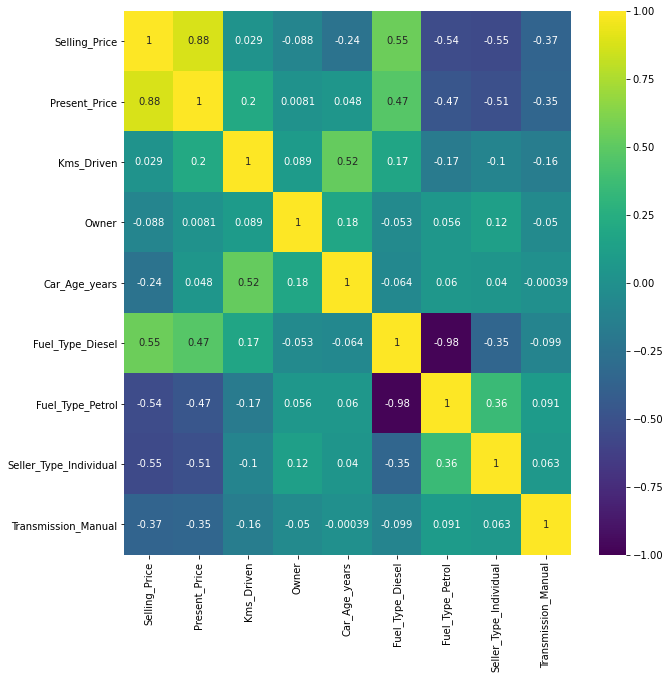

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(car_df.corr(),vmax=1,vmin=-1,cmap="viridis",annot=True)

<AxesSubplot:>

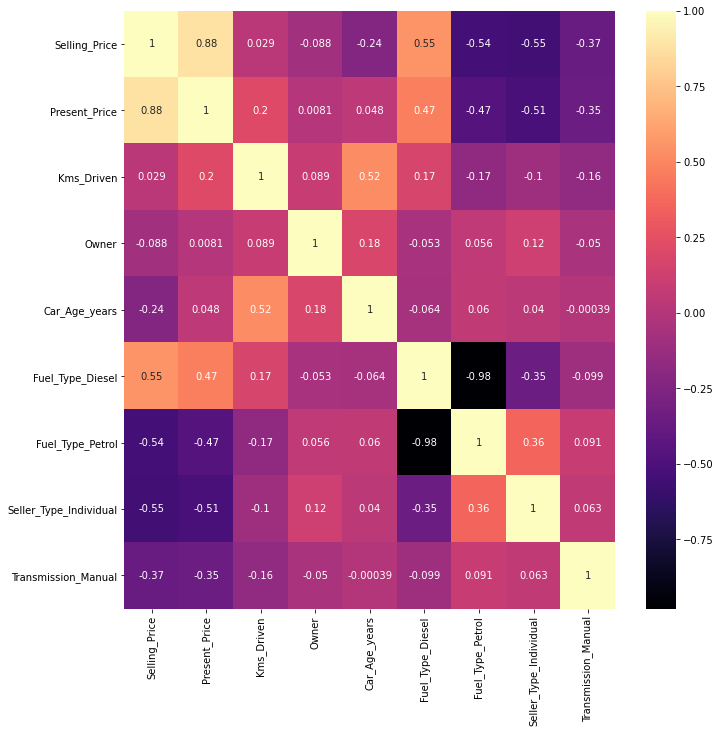

In [59]:
corrmat = car_df.corr()
top_corr_featues = corrmat.index
plt.figure(figsize=(11,11))
sns.heatmap(car_df[top_corr_featues].corr(),cmap="magma",annot=True)

*Splitting into dependent and independent features from dataset*

In [60]:
car_df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Car_Age_years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [106]:
ind_columns = list(car_df.columns)[1:]
dep_columns = list(car_df.columns)[0]
X = car_df.iloc[:,1:]
y = car_df.iloc[:,0]

In [103]:
dep_columns

'Selling_Price'

In [104]:
ind_columns

['Present_Price',
 'Kms_Driven',
 'Owner',
 'Car_Age_years',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Seller_Type_Individual',
 'Transmission_Manual']

In [98]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [99]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


**Obtain feature importance using ExtraTreeRegressor**

In [64]:
from sklearn.ensemble import ExtraTreesRegressor
extre_model = ExtraTreesRegressor()

In [107]:
extre_model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [108]:
feature_imp = list(extre_model.feature_importances_)

In [109]:
imp_dict = {k:v for (k,v) in zip(ind_columns,feature_imp)}

In [110]:
imp_dict

{'Present_Price': 0.4980995746498872,
 'Kms_Driven': 0.03892156039099644,
 'Owner': 0.0004243865511115221,
 'Car_Age_years': 0.09076802097163404,
 'Fuel_Type_Diesel': 0.1624428024617669,
 'Fuel_Type_Petrol': 0.0071854489730265635,
 'Seller_Type_Individual': 0.12482198919858956,
 'Transmission_Manual': 0.07733621680298772}

<AxesSubplot:>

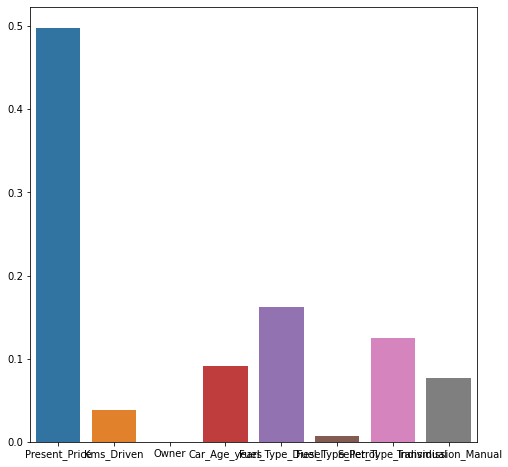

In [111]:
plt.figure(figsize=(8,8))
sns.barplot(ind_columns,feature_imp) 

<AxesSubplot:>

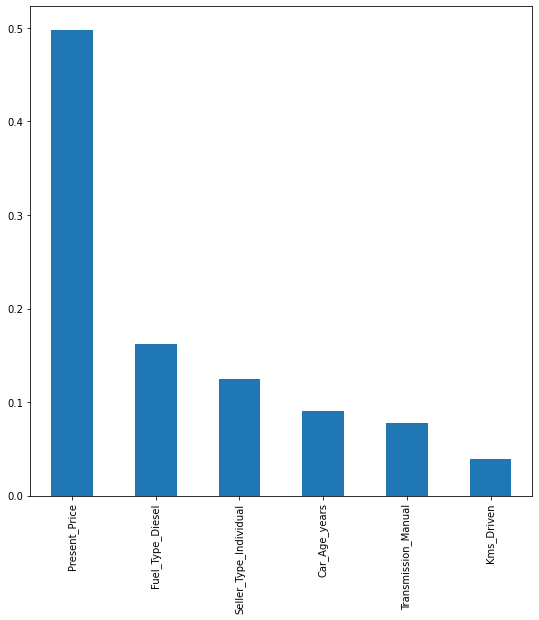

In [112]:
# Plotting the top 6 features for feature selection based on feature importance using ExtratreeRegressor
plt.figure(figsize=(9,9))
f_imp_series = pd.Series(feature_imp,index=ind_columns)
f_imp_series.nlargest(6).plot(kind="bar")


**Train and test split**

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape,y_train.shape)


(210, 8) (210,)


In [118]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Car_Age_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
222,7.60,77632,0,8,1,0,0,1
283,11.80,9010,0,6,0,1,0,1
44,2.69,50000,0,10,0,1,0,1
245,9.40,71000,0,10,1,0,0,1
191,0.57,25000,1,10,0,1,1,1


In [120]:
y_train.head()

222    6.00
283    8.99
44     1.25
245    5.20
191    0.20
Name: Selling_Price, dtype: float64

**Use Random Forest Reggressor as ML model**

In [78]:
from sklearn.ensemble import RandomForestRegressor
reg_model = RandomForestRegressor()

**Use RandomSearchCV for Hyperparameter Tuning of RF Reggressor model**

In [86]:
n_estimators = [int(x) for x in np.linspace(100,1000,num=10)]
max_features = ['auto','sqrt']
max_depth = np.arange(5,31,step=5,dtype=np.int64).tolist()
min_samples_split = [2,5,10,20,50]
min_samples_leaf = [2,5,10,12,20,50]

In [88]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {"n_estimators": n_estimators,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf
              }


In [122]:
rand_ser_cv = RandomizedSearchCV(reg_model,param_distributions=grid_params,n_iter=10,n_jobs=1,
                                 scoring="neg_mean_squared_error",verbose=2,cv=10)

In [123]:
# Using the various hyper parameters for RF Reggressor model from grid_params dict and fitting it to X_train and y_train
rand_ser_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=800, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=15 
[CV]  n_estimators=800, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=15, total=   0.9s
[CV] n_estimators=800, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=15, total=   0.9s
[CV] n_estimators=800, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=15 
[CV]  n_estimators=800, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=15, total=   0.9s
[CV] n_estimators=800, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=15 
[CV]  n_estimators=800, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=15, total=   0.9s
[CV] n_estimators=800, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=15 
[CV]  n_estimators=800, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=15, total=   0.9s
[CV] n_estimators=800, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=15 
[CV]  n_estimators=800, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=15, total=   0.9s
[CV] n_estimators=800, min_samples

[CV]  n_estimators=400, min_samples_split=50, min_samples_leaf=50, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=400, min_samples_split=50, min_samples_leaf=50, max_features=auto, max_depth=10 
[CV]  n_estimators=400, min_samples_split=50, min_samples_leaf=50, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=400, min_samples_split=50, min_samples_leaf=50, max_features=auto, max_depth=10 
[CV]  n_estimators=400, min_samples_split=50, min_samples_leaf=50, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=400, min_samples_split=50, min_samples_leaf=50, max_features=auto, max_depth=10 
[CV]  n_estimators=400, min_samples_split=50, min_samples_leaf=50, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=400, min_samples_split=50, min_samples_leaf=50, max_features=auto, max_depth=10 
[CV]  n_estimators=400, min_samples_split=50, min_samples_leaf=50, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=400, min_samples

[CV]  n_estimators=100, min_samples_split=20, min_samples_leaf=20, max_features=sqrt, max_depth=15, total=   0.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.6s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.6s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.6s
[CV] n_estimators=500, min_samples_split=1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 20, 50], 'min_samples_leaf': [2, 5, 10, 12, 20, 50]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [124]:
rand_ser_cv.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 30}

In [125]:
rand_ser_cv.best_score_

-4.940551796373687

In [126]:
# Getting predictions from RF model
y_pred = rand_ser_cv.predict(X_test)
y_pred

array([ 6.99354665,  0.52125396,  4.81139316,  8.6040292 , 11.66928968,
        5.0237656 ,  3.3366521 ,  0.41307866,  3.97358384,  4.73831304,
        2.97087979,  0.68995547,  4.86974744,  7.2871153 ,  7.53575281,
       11.63630042,  7.12687564,  4.05201166,  0.49083693,  1.34270948,
        3.33544673,  4.88159019,  5.10279416, 10.58615676,  0.18673495,
        0.70204779,  0.307136  ,  0.69384253,  0.52231683,  5.23078267,
        2.81726954,  5.98767323,  0.49565539,  7.36625555,  3.48207727,
        1.24113611,  5.63677423,  5.33734751,  0.20954197,  8.78989069,
        7.83926227, 20.08134409,  4.83114262,  4.53419345,  5.64072004,
       10.94087755,  0.25921624,  0.80911257,  5.10953766,  6.71244925,
        6.84268556,  3.28701902,  5.02177643, 20.08246991,  1.22601636,
        1.15202206,  0.39227362,  2.71220395,  3.62956191,  2.36635609,
        4.9758088 ,  5.80034581,  3.07026623, 20.14293926,  4.55954297,
        5.70560863, 10.15857974,  5.85355809,  0.4118744 ,  3.05

<AxesSubplot:xlabel='Selling_Price'>

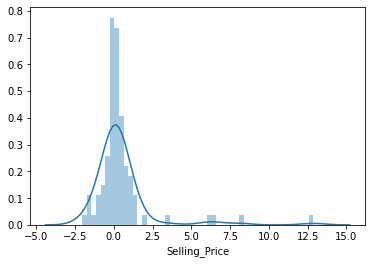

In [127]:
sns.distplot(y_test-y_pred)

<AxesSubplot:xlabel='Selling_Price'>

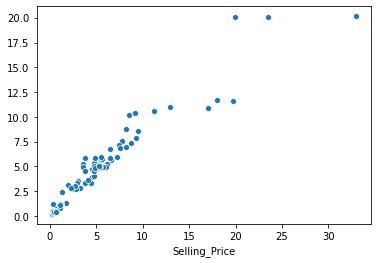

In [128]:
sns.scatterplot(y_test,y_pred)

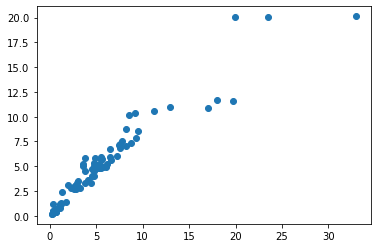

In [129]:
plt.scatter(y_test,y_pred)

In [142]:
new_y = y_test.to_list()
new_y_pred = y_pred.tolist()

In [146]:
new_df = pd.DataFrame({"target":new_y,"pred_target":new_y_pred})

In [147]:
# Dataframe to show the target and predicted values for the given regression problems
new_df

,target,pred_target
0,8.25,6.993547
1,0.50,0.521254
2,5.25,4.811393
3,9.50,8.604029
4,18.00,11.669290
...,...,...
86,5.35,4.886478
87,5.50,5.941723
88,0.60,0.507058
89,5.30,5.018187


**Saving the created RF model in the form of pickle file**

In [148]:
import pickle
file = open("random_forest_regressor_model.pkl","wb")
pickle.dump(rand_ser_cv,file)

In [150]:
!pip install sklearn